In [113]:
from datascience import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plots

plots.style.use('fivethirtyeight')
%matplotlib inline 

In [114]:
#At this stage, not importing all libraries with an purpose for each
#Will update (add, remove as needed)
import seaborn as sns
sns.set(color_codes = True)
from scipy import stats
from scipy.stats import norm


In [115]:
#Formulas contains the chemcial formulas for the 21k plus superconductors 
#from the National Institute of Materials Science (NIMS) in Japan
formulas = pd.read_csv("https://raw.githubusercontent.com/9161AD/superconduct-/master/superconductorformulas.csv")
formulas.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [116]:
#Features contains raw and statistical atomic features of the superconducting
#compounds. Again, taken from NIMS in Japan
features = pd.read_csv("https://raw.githubusercontent.com/9161AD/superconduct-/master/superconductorfeatures.csv")
features.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [117]:
#Adding material name to features dataframe
features['material_name'] = formulas['material']


In [118]:
#Moving critical_temp and then material_name column to left of dataframe
#Note that the raw order row of compounds by is the same in both data sets.
# This was determined by comparing the listing of critical temperatures

#This move was done as a data wrangling step. The defining property of
# any superconductor are its chemical formula and critcial temperature
features2 = features
col = "critical_temp" 
features2 = pd.concat([features[col],features.drop(col,axis=1)], axis=1)
features3 = features2
col2 = "material_name"
features3 = pd.concat([features2[col2],features2.drop(col2,axis=1)], axis=1)

In [11]:
features3.head()

,material_name,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,Ba0.2La1.8Cu1O4,29.0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,Ba0.1La1.9Ag0.1Cu0.9O4,26.0,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,Ba0.1La1.9Cu1O4,19.0,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,Ba0.15La1.85Cu1O4,22.0,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,Ba0.3La1.7Cu1O4,23.0,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [12]:
#sort by descending critical temperature 
#This move was done as a data wrangling step as the data analysis
# will focus on classes of superconductors with higher temperature
# including Fe-based, cuprates, and Hg based

features4 = features3.sort_values('critical_temp' ,ascending =False)
features4.head()

,material_name,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
20573,H2S1,185.0,2,16.536470,11.360293,5.685033,3.193745,0.136394,0.224622,31.05706,...,3.500000,2.666667,2.449490,1.817121,0.410116,0.562335,5,1.333333,2.500000,2.357023
3985,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,143.0,6,110.790067,53.779128,78.419756,34.814175,1.534148,1.685378,191.20060,...,2.333333,2.041769,2.244924,2.029163,1.747868,1.416675,2,0.950860,0.745356,0.285996
5200,Hg0.7Pb0.3Ba2Ca2Cu3O8,143.0,6,110.790067,54.751013,78.419756,35.634607,1.534148,1.676546,191.20060,...,2.333333,2.037500,2.244924,2.026163,1.747868,1.432405,2,0.925000,0.745356,0.271282
19039,Tl0.8Hg0.2Ba2Ca2Cu3O9,137.4,6,110.320617,52.533367,78.241067,34.005520,1.535695,1.653117,188.38390,...,2.166667,2.047059,2.139826,2.038528,1.778233,1.377140,1,1.035294,0.372678,0.211765
1343,Bi1.8Pb0.2Sb0.1Sr2Ca2Cu2O,136.0,7,106.454829,91.018475,78.774541,69.276239,1.709748,1.488831,192.98100,...,3.142857,2.670330,2.869006,2.458852,1.855373,1.656659,3,0.934066,1.355262,1.231946


In [70]:
#Removing "Redundant" features. 
#Each feature had 11 versions of it 
#Keeping only the wtd_geometric_means
features5= features4[['material_name','critical_temp','number_of_elements','wtd_gmean_atomic_mass',
                    'wtd_gmean_fie','wtd_gmean_atomic_radius','wtd_gmean_Density',
                     'wtd_gmean_ElectronAffinity','wtd_gmean_FusionHeat',
                     'wtd_gmean_ThermalConductivity','wtd_gmean_Valence',
                     ]]
features5.head()

,material_name,critical_temp,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
20573,H2S1,185.0,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121
3985,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,143.0,6,34.814175,934.741621,91.656481,72.402056,54.820167,1.302412,1.426268,2.029163
5200,Hg0.7Pb0.3Ba2Ca2Cu3O8,143.0,6,35.634607,925.775437,93.530228,82.661372,53.184517,1.381810,1.636298,2.026163
19039,Tl0.8Hg0.2Ba2Ca2Cu3O9,137.4,6,34.005520,927.055095,89.709076,64.905202,60.272812,1.260402,1.356990,2.038528
1343,Bi1.8Pb0.2Sb0.1Sr2Ca2Cu2O,136.0,7,69.276239,696.388472,149.527551,1815.260136,28.021247,6.475372,29.618829,2.458852


In [69]:
features5.shape


(21263, 11)

Text(0,0.5,'Count')

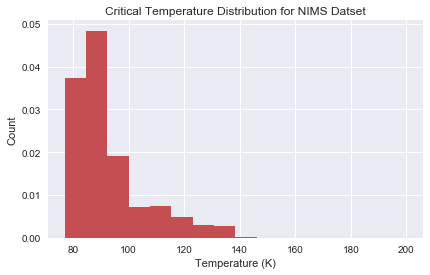

In [143]:
#Normalized for all classes
features5.hist('critical_temp', bins = 16, range = (77,200), color = 'r', density=1)
plots.title('Critical Temperature Distribution for NIMS Datset')
plots.xlabel("Temperature (K)")
plots.ylabel("Count")


In [145]:
featureshigh = features5[features5.critical_temp >=77]
len(featureshigh)

3952

In [75]:
total_rows_raw = len(features5)
total_rows_raw

21263

In [119]:
features6 = features5[features5.critical_temp >=0]
features6.head()


,material_name,critical_temp,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
20573,H2S1,185.0,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121
3985,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,143.0,6,34.814175,934.741621,91.656481,72.402056,54.820167,1.302412,1.426268,2.029163
5200,Hg0.7Pb0.3Ba2Ca2Cu3O8,143.0,6,35.634607,925.775437,93.530228,82.661372,53.184517,1.381810,1.636298,2.026163
19039,Tl0.8Hg0.2Ba2Ca2Cu3O9,137.4,6,34.005520,927.055095,89.709076,64.905202,60.272812,1.260402,1.356990,2.038528
1343,Bi1.8Pb0.2Sb0.1Sr2Ca2Cu2O,136.0,7,69.276239,696.388472,149.527551,1815.260136,28.021247,6.475372,29.618829,2.458852


In [120]:
features6.shape


(21263, 11)

In [121]:
(3952/total_rows_raw) * 100
#Only 18% of rows remain 

18.58627663076706

In [122]:
#Iron Based contain copper. All in HTC regime contain copper in fact
#Will show this 
features_Cu_Fe = features6[features6['material_name'].str.contains("Cu" or "Fe")]
features_Cu_Fe

,material_name,critical_temp,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
3985,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,143.000,6,34.814175,934.741621,91.656481,72.402056,54.820167,1.302412,1.426268,2.029163
5200,Hg0.7Pb0.3Ba2Ca2Cu3O8,143.000,6,35.634607,925.775437,93.530228,82.661372,53.184517,1.381810,1.636298,2.026163
19039,Tl0.8Hg0.2Ba2Ca2Cu3O9,137.400,6,34.005520,927.055095,89.709076,64.905202,60.272812,1.260402,1.356990,2.038528
1343,Bi1.8Pb0.2Sb0.1Sr2Ca2Cu2O,136.000,7,69.276239,696.388472,149.527551,1815.260136,28.021247,6.475372,29.618829,2.458852
1341,Bi1.6Pb0.4Sb0.1Sr2Ca2Cu2O,136.000,7,69.263213,696.654032,149.771292,1821.174204,27.454729,6.358822,30.595342,2.446823
5476,Hg0.75Ba2.07Ca2.07Cu3.11O8.208,135.800,5,34.675999,928.979515,93.016742,77.320991,53.047373,1.362431,1.578244,2.000000
7105,Hg1Ba2Ca2Cu3O8,135.700,5,35.612951,931.716637,93.714039,82.935956,50.092380,1.362928,1.592736,2.000000
4709,Hg1Ba2Ca2Cu3O8,135.500,5,35.612951,931.716637,93.714039,82.935956,50.092380,1.362928,1.592736,2.000000
5475,Hg0.75Ba2.07Ca2.07Cu3.11O8.187,135.400,5,34.710813,928.562538,93.096612,77.722371,52.979411,1.365642,1.586629,2.000000
7124,Hg1Ba2Ca2Cu3O8.27,135.000,5,35.143187,937.036981,92.679305,77.530779,50.969045,1.322496,1.488144,2.000000


In [124]:
features_Fe_only = features_Cu_Fe[~features_Cu_Fe.material_name.str.contains("Cu")]
len(features_Fe_only) 

0

In [ ]:
#We see that there are no Iron based superconductors that do not contain copper in the High Temperature Regime
#Which is in accordance with definition of Iron based Superconductors 

In [125]:
#Isolating Fe, Cu, H, Hf, Hs, Ho based superconductors via partial string selection 
#Iron Based contain copper as well where as Cuprates contain Copper and Oxygen (copper oxides)

features7 = features6[features6['material_name'].str.contains("H" or "Cu" or "Fe")]
features7.head()

,material_name,critical_temp,number_of_elements,wtd_gmean_atomic_mass,wtd_gmean_fie,wtd_gmean_atomic_radius,wtd_gmean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_FusionHeat,wtd_gmean_ThermalConductivity,wtd_gmean_Valence
20573,H2S1,185.0,2,3.193745,1197.631481,62.520676,2.511454,103.613790,0.813651,0.188323,1.817121
3985,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,143.0,6,34.814175,934.741621,91.656481,72.402056,54.820167,1.302412,1.426268,2.029163
5200,Hg0.7Pb0.3Ba2Ca2Cu3O8,143.0,6,35.634607,925.775437,93.530228,82.661372,53.184517,1.381810,1.636298,2.026163
19039,Tl0.8Hg0.2Ba2Ca2Cu3O9,137.4,6,34.005520,927.055095,89.709076,64.905202,60.272812,1.260402,1.356990,2.038528
5476,Hg0.75Ba2.07Ca2.07Cu3.11O8.208,135.8,5,34.675999,928.979515,93.016742,77.320991,53.047373,1.362431,1.578244,2.000000


In [130]:
len(features7)

1586

In [131]:
(1586/total_rows_raw) * 100 
#~ 7.458% of rows left 

7.45896627945257

In [132]:
features7.to_csv('features_H_Cu_Fe2.csv')

In [133]:
#sStarting a separate Visualizations Notebook 
#See Data_Visualizations
#Update Name ??? 

In [ ]:
features